In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

if __name__ == "__main__":
    embed = hub.Module("https://tfhub.dev/google/nnlm-ja-dim128/1")

    df_train = pd.read_csv("aozora_8writers_multiple_train.csv",  delimiter=',')
    le = LabelEncoder()
    le = le.fit(df_train["label"])
    df_train["num_label"] = le.transform(df_train["label"])
    df_train = shuffle(df_train)
    df_train_list = df_train["text"].values.tolist()
    m_train = embed(df_train_list)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        text_vector_train = sess.run(m_train)

    df_test = pd.read_csv("aozora_8writers_multiple_test.csv",  delimiter=',')
    df_test["num_label"] = le.transform(df_test["label"])
    df_test_list = df_test["text"].values.tolist()
    m_test = embed(df_test_list)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        text_vector_test = sess.run(m_test)

W0706 22:57:17.487056 4582110656 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
W0706 22:57:18.096447 4582110656 deprecation.py:323] From /usr/local/lib/python2.7/site-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0706 22:57:18.981398 4582110656 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0706 22:57:23.057614 4582110656 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [2]:
clf = RandomForestClassifier(n_estimators=500, random_state = 0)
clf.fit(text_vector_train, df_train["num_label"])
predict_label = clf.predict(text_vector_test)

0.5317460317460317


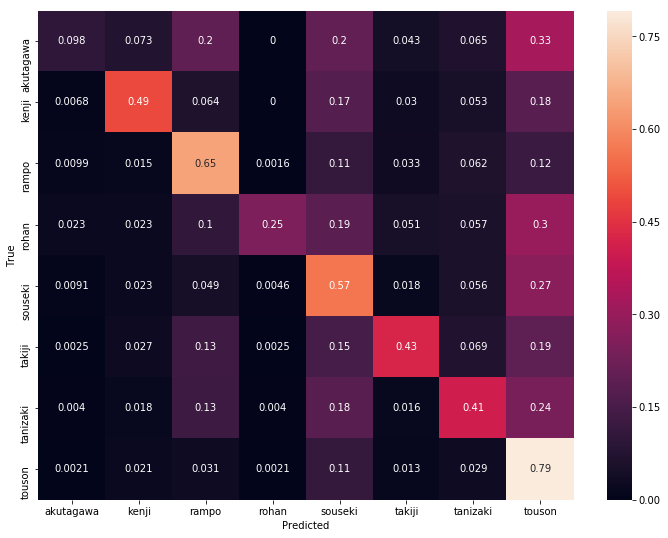

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print accuracy_score(df_test["num_label"], predict_label)

LABELS = ["akutagawa", "kenji", "rampo", "rohan",
          "souseki", "takiji", "tanizaki", "touson"]

cm_out = confusion_matrix(df_test["num_label"], predict_label)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 9))
sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");